# Upload the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
transactions_df = pd.read_csv("coffee.csv")
transactions_df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,1,1/1/2023,7:06:11,5,Lower Manhattan,32,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1,6
1,2,1/1/2023,7:08:56,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6
2,3,1/1/2023,7:14:04,5,Lower Manhattan,59,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1,6
3,4,1/1/2023,7:20:24,5,Lower Manhattan,22,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6
4,5,1/1/2023,7:22:41,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6


In [4]:
transactions_df.shape

(149116, 18)

In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

**Note:**  

The dataset is transactions data from a coffee shop which contains 149116 rows (non-null) and 18 columns.  

Since the objective of the project is to develop ABC Analysis (on products) and FRM analysis (on customers), I will simulate a new `customer_id` column which based on the normal distribution, on this transactions table and use it as a foreign key to a new table named `customers_df`.  

I will also create a table named `products_df` which cotains information about all of the products using `product_id` as the foreign key.

# Data Cleaning

Let's begin by cleaning the original transactions dataset

Columns from the `transactions_df` can be removed such as `transaction_time`, `product_id`, `store_id`, `store_location`, `product_category`, `product_type`, `size`, `Month Name`, `Day Name`, `Hour`, `Month`, `Day of Week` as they are out of the scope of the project

In [10]:
# Drop columns
transactions_df = transactions_df.drop(['transaction_time', 'product_id', 'store_id', 'store_location', 'product_category', 'product_type', 'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'], axis=1)

transactions_df.head()

,transaction_id,transaction_date,transaction_qty,unit_price,Total_Bill,product_detail
0,1,1/1/2023,2,3.0,6.0,Ethiopia
1,2,1/1/2023,2,3.1,6.2,Spicy Eye Opener Chai
2,3,1/1/2023,2,4.5,9.0,Dark chocolate
3,4,1/1/2023,1,2.0,2.0,Our Old Time Diner Blend
4,5,1/1/2023,2,3.1,6.2,Spicy Eye Opener Chai


In [11]:
# Group by product_name and check for their unit_price
duplicate_products = transactions_df.groupby('product_detail')['unit_price'].nunique()

# Filter to show same products with different prices
duplicate_products = duplicate_products[duplicate_products > 1]

# Result
print(duplicate_products)

product_detail
Almond Croissant             2
Brazilian                    3
Cappuccino                   2
Chocolate Chip Biscotti      2
Chocolate Croissant          2
Columbian Medium Roast       4
Cranberry Scone              2
Croissant                    2
Dark chocolate               3
Earl Grey                    3
English Breakfast            3
Ethiopia                     4
Ginger Biscotti              2
Ginger Scone                 3
Hazelnut Biscotti            2
I Need My Bean! Diner mug    2
I Need My Bean! Latte cup    2
I Need My Bean! T-shirt      2
Jamaican Coffee River        3
Jumbo Savory Scone           2
Latte                        2
Lemon Grass                  3
Morning Sunrise Chai         3
Organic Decaf Blend          4
Our Old Time Diner Blend     4
Ouro Brasileiro shot         2
Peppermint                   3
Scottish Cream Scone         2
Serenity Green Tea           3
Spicy Eye Opener Chai        3
Sustainably Grown Organic    3
Traditional Blend Chai  

**Observation:**

There are a lot of same products' names with different prices. This phenomenon may due to the orginal dataset was from a coffee brand with a lot of stores, and they may have different products' prices for different branches.

**Action: We assume the price for each product is the mode price**

In [13]:
mode_prices = transactions_df.groupby('product_detail')['unit_price'].agg(lambda x: x.mode()[0])
transactions_df['unit_price'] = transactions_df['product_detail'].map(mode_prices)

# Create new total price column base on new unit price
transactions_df['total_price'] = transactions_df['transaction_qty'] * transactions_df['unit_price']

# Drop total bill column
transactions_df = transactions_df.drop('Total_Bill', axis=1)

# Display
transactions_df.head()

,transaction_id,transaction_date,transaction_qty,unit_price,product_detail,total_price
0,1,1/1/2023,2,3.0,Ethiopia,6.0
1,2,1/1/2023,2,3.1,Spicy Eye Opener Chai,6.2
2,3,1/1/2023,2,4.5,Dark chocolate,9.0
3,4,1/1/2023,1,2.0,Our Old Time Diner Blend,2.0
4,5,1/1/2023,2,3.1,Spicy Eye Opener Chai,6.2


In [14]:
# Double check if there are still same products with different prices
duplicate_products_check = transactions_df.groupby('product_detail')['unit_price'].nunique()

# Filter to show same products with different prices
duplicate_products_check = duplicate_products_check[duplicate_products_check > 1]

# Result
print(duplicate_products_check)

Series([], Name: unit_price, dtype: int64)


In [15]:
# Rename columns
transactions_df = transactions_df.rename(columns={'transaction_qty': 'quantity', 'product_detail': 'product_name'})

transactions_df.head()

,transaction_id,transaction_date,quantity,unit_price,product_name,total_price
0,1,1/1/2023,2,3.0,Ethiopia,6.0
1,2,1/1/2023,2,3.1,Spicy Eye Opener Chai,6.2
2,3,1/1/2023,2,4.5,Dark chocolate,9.0
3,4,1/1/2023,1,2.0,Our Old Time Diner Blend,2.0
4,5,1/1/2023,2,3.1,Spicy Eye Opener Chai,6.2


In [16]:
# Checking for duplicate entries
duplicate = transactions_df[transactions_df.duplicated()]

duplicate

,transaction_id,transaction_date,quantity,unit_price,product_name,total_price


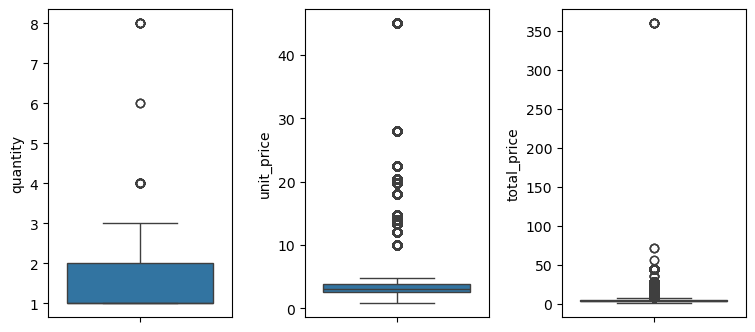

In [17]:
# Checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['quantity', 'unit_price', 'total_price']

fig, axes = plt.subplots(ncols=3, figsize=(9, 4))
for i, num_col in enumerate(num_cols):
    sns.boxplot(y=transactions_df[num_col], ax=axes[i])

fig.subplots_adjust(wspace=0.4)

**Observation:**

- All three columns have outliers
- However, buying eight items at once and an item priced at $45 does not unreasonable

In [19]:
# Convert transaction_date to datetime data type
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'], format='mixed', dayfirst=True)

# Simulate `customer_id` column

In [21]:
np.random.seed(42)  
num_customers = 100000

# Generate customer_id with normal distribution (mean=50000 and std=15000)
customer_ids = np.random.normal(loc=50000, scale=15000, size=num_customers).astype(int)
customer_ids = np.clip(customer_ids, 1, num_customers)
customer_ids = [f"C_{cid}" for cid in customer_ids]

# Create the new 'customer_id' column for transactions_df
transactions_df['customer_id'] = np.random.choice(customer_ids, size=len(transactions_df))

# Display
transactions_df.head()

,transaction_id,transaction_date,quantity,unit_price,product_name,total_price,customer_id
0,1,2023-01-01,2,3.0,Ethiopia,6.0,C_39213
1,2,2023-01-01,2,3.1,Spicy Eye Opener Chai,6.2,C_65887
2,3,2023-01-01,2,4.5,Dark chocolate,9.0,C_60886
3,4,2023-01-01,1,2.0,Our Old Time Diner Blend,2.0,C_56516
4,5,2023-01-01,2,3.1,Spicy Eye Opener Chai,6.2,C_70833


**Note:**  

We can check the distribution of number of purchasing time from each customer with the chart below

In [23]:
# import matplotlib.pyplot as plt

# plt.hist(customer_ids, bins=50, edgecolor='black')
# plt.title("Distribution of Customer IDs")
# plt.xlabel("Customer ID")
# plt.ylabel("Frequency")
# plt.show()

# Create `customers_df`

In [25]:
# Create customers_df with 3 columns
customers_df = (
    transactions_df.groupby('customer_id')
    .agg(
        total_spending=('total_price', 'sum'),                 
        last_purchase_date=('transaction_date', 'max')        
    )
    .reset_index()
)

# Display
customers_df.head()

,customer_id,total_spending,last_purchase_date
0,C_1,289.8,2023-06-26
1,C_100000,204.5,2023-06-29
2,C_10002,9.5,2023-04-05
3,C_10043,9.0,2023-06-19
4,C_10045,9.1,2023-06-13


**Note:**  

Of course, in the reality, the customer dataset may have more columns about customers' information such as names, addresses, contact information, date of birth, etc. However, this is out of the scope of the project, which is to perform the FRM analysis on the customers.

# Simulate `product_id` column

In [28]:
# List of unique products
unique_products = transactions_df['product_name'].unique()

# Create product_id for each product
product_ids = {product: f"P_{i+1}" for i, product in enumerate(unique_products)}

# Map product_id for a new column in transactions_df
transactions_df['product_id'] = transactions_df['product_name'].map(product_ids)

# Result
transactions_df[['product_name', 'product_id']].head(20)

,product_name,product_id
0,Ethiopia,P_1
1,Spicy Eye Opener Chai,P_2
2,Dark chocolate,P_3
3,Our Old Time Diner Blend,P_4
4,Spicy Eye Opener Chai,P_2
5,Oatmeal Scone,P_5
6,Our Old Time Diner Blend,P_4
7,Columbian Medium Roast,P_6
8,Latte,P_7
9,Dark chocolate,P_3


# Create `products_df`

In [30]:
products_df = transactions_df[['product_id', 'product_name', 'unit_price']].drop_duplicates()

products_df

,product_id,product_name,unit_price
0,P_1,Ethiopia,3.00
1,P_2,Spicy Eye Opener Chai,3.10
2,P_3,Dark chocolate,4.50
3,P_4,Our Old Time Diner Blend,2.00
5,P_5,Oatmeal Scone,3.00
7,P_6,Columbian Medium Roast,2.50
8,P_7,Latte,3.75
12,P_8,Earl Grey,2.50
14,P_9,Ouro Brasileiro shot,3.00
15,P_10,Serenity Green Tea,2.50


This products_df is basically the coffee shop's menu.  

**Action: Simulate `Stock` column with random number to turn this table into the inventory table**

In [32]:
np.random.seed(42)

products_df['stock'] = np.random.randint(100, 500, size=len(products_df))

products_df.head(20)

,product_id,product_name,unit_price,stock
0,P_1,Ethiopia,3.00,202
1,P_2,Spicy Eye Opener Chai,3.10,448
2,P_3,Dark chocolate,4.50,370
3,P_4,Our Old Time Diner Blend,2.00,206
5,P_5,Oatmeal Scone,3.00,171
7,P_6,Columbian Medium Roast,2.50,288
8,P_7,Latte,3.75,120
12,P_8,Earl Grey,2.50,202
14,P_9,Ouro Brasileiro shot,3.00,221
15,P_10,Serenity Green Tea,2.50,314


# Display 3 main tables being used in the project

In [34]:
# Display the tables
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Transactions Table", dataframe=transactions_df)
tools.display_dataframe_to_user(name="Inventory Table", dataframe=products_df)
tools.display_dataframe_to_user(name="Customer Data Table", dataframe=customers_df)

Transactions Table


Inventory Table


Customer Data Table


# Data Analysis

## ABC Analysis

ABC analysis is an inventory categorisation technique which divides inventory into three categories: 'A' items, with very tight control and accurate records, 'B' items, less tightly controlled and with moderate records, and 'C' items, with the simplest controls possible and minimal records. An ABC analysis provides a mechanism for identifying items that will have a significant impact on overall inventory cost, while also providing a mechanism for identifying different categories of stock that will require different management and controls.

In [38]:
# Group by ProductID and ProductName to calculate Total Sales Value
abc_df = transactions_df.groupby(["product_id", "product_name"]).agg(
    total_sales=("total_price", "sum"),
    total_quantity=("quantity", "sum")
).reset_index()

# Sort by Total Sales in descending order
abc_df = abc_df.sort_values(by="total_sales", ascending=False)

# Calculate percentage of total quantity
abc_df["quantity_proportion"] = abc_df["total_quantity"] / abc_df["total_quantity"].sum() * 100

# Calculate cumulative percentage of Total Sales
abc_df["cumulative_sales_percent"] = abc_df["total_sales"].cumsum() / abc_df["total_sales"].sum() * 100

# Display
abc_df

,product_id,product_name,total_sales,total_quantity,quantity_proportion,cumulative_sales_percent
15,P_23,Jamaican Coffee River,46616.25,12431,5.796149,6.878081
4,P_13,Sustainably Grown Organic,42764.25,9003,4.197790,13.187811
0,P_1,Ethiopia,39813.00,13271,6.187812,19.062094
22,P_3,Dark chocolate,39568.50,8793,4.099874,24.900301
10,P_19,Brazilian,39036.00,13012,6.067049,30.659940
42,P_7,Latte,34121.25,9099,4.242551,35.694423
41,P_6,Columbian Medium Roast,32670.00,13068,6.093160,40.514778
6,P_15,Cappuccino,31563.75,8417,3.924558,45.171910
11,P_2,Spicy Eye Opener Chai,26960.70,8697,4.055113,49.149876
33,P_4,Our Old Time Diner Blend,26148.00,13074,6.095957,53.007931


In [39]:
# Assign categories based on cumulative percentage
def assign_category(cum_percent):
    if cum_percent <= 80:
        return "A"
    elif cum_percent <= 95:
        return "B"
    else:
        return "C"

abc_df["category"] = abc_df["cumulative_sales_percent"].apply(assign_category)
abc_df = abc_df.reset_index(drop=True)

# Display
abc_df 

,product_id,product_name,total_sales,total_quantity,quantity_proportion,cumulative_sales_percent,category
0,P_23,Jamaican Coffee River,46616.25,12431,5.796149,6.878081,A
1,P_13,Sustainably Grown Organic,42764.25,9003,4.197790,13.187811,A
2,P_1,Ethiopia,39813.00,13271,6.187812,19.062094,A
3,P_3,Dark chocolate,39568.50,8793,4.099874,24.900301,A
4,P_19,Brazilian,39036.00,13012,6.067049,30.659940,A
5,P_7,Latte,34121.25,9099,4.242551,35.694423,A
6,P_6,Columbian Medium Roast,32670.00,13068,6.093160,40.514778,A
7,P_15,Cappuccino,31563.75,8417,3.924558,45.171910,A
8,P_2,Spicy Eye Opener Chai,26960.70,8697,4.055113,49.149876,A
9,P_4,Our Old Time Diner Blend,26148.00,13074,6.095957,53.007931,A


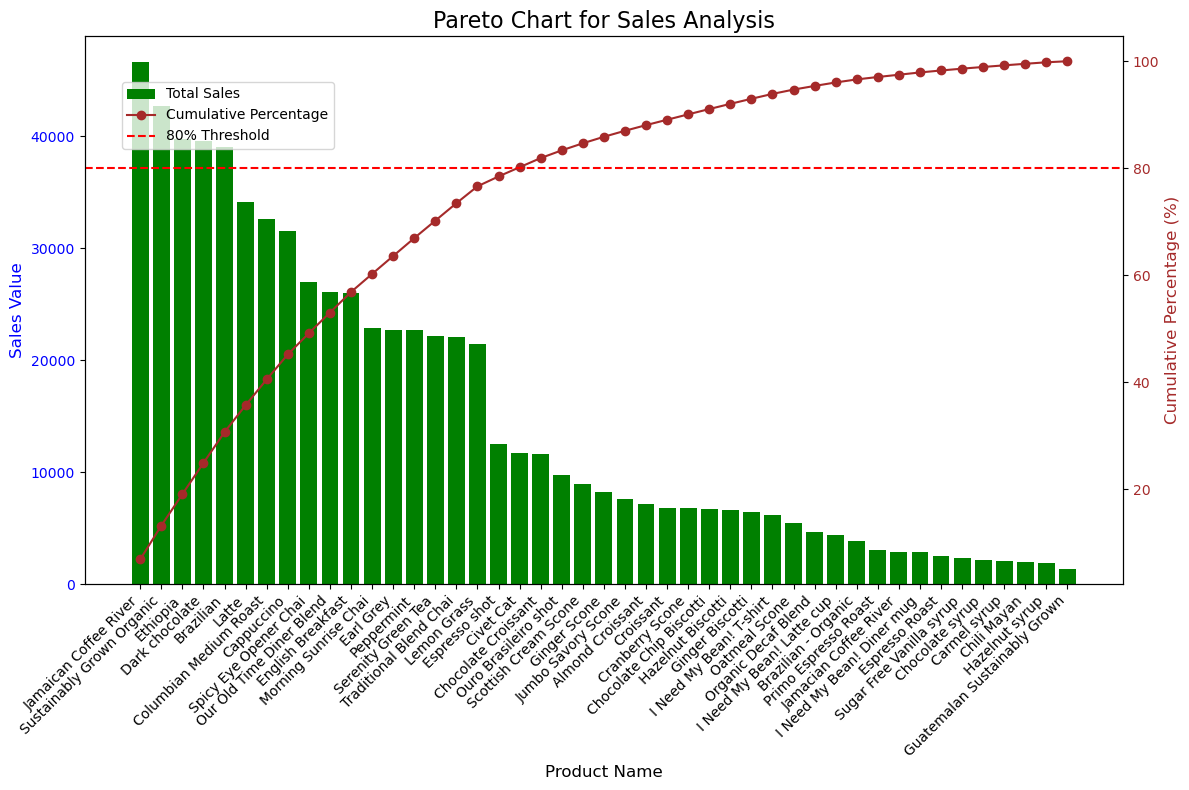

In [40]:
# Pareto chart

def create_pareto_chart(data, product_col, sales_col, cumulative_col, title="Pareto Chart"):
    # Create the Pareto chart
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Bar plot for sales value
    ax1.bar(data[product_col], data[sales_col], color="green", label="Total Sales")
    ax1.set_xlabel("Product Name", fontsize=12)
    ax1.set_ylabel("Sales Value", fontsize=12, color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_title(title, fontsize=16)

    # Rotate the label
    plt.xticks(rotation=45, ha="right", fontsize=10)
    
    # Line plot for cumulative percentage
    ax2 = ax1.twinx()
    ax2.plot(
        data[product_col], data[cumulative_col],
        color="brown", marker="o", label="Cumulative Percentage"
    )
    ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12, color="brown")
    ax2.tick_params(axis="y", labelcolor="brown")

    # Add 80% threshold line
    ax2.axhline(y=80, color="red", linestyle="--", label="80% Threshold")

    # Add legends
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.tight_layout()
    plt.show()

# Create pareto chart
create_pareto_chart(
    data=abc_df,
    product_col="product_name",
    sales_col="total_sales",
    cumulative_col="cumulative_sales_percent",
    title="Pareto Chart for Sales Analysis"
)

**Note:**

Pareto chart is a data analysis tool according to the 80/20 rule (Pareto Principle). It identifies the small portion of data (20%) that contributes to the majority of results (80%).  

- Left Y-axis: Total sales value (Sales Value), expressed in bars.
- Right Y-axis: Cumulative rate of total sales value (Cumulative Sales %), represented by a curve.  

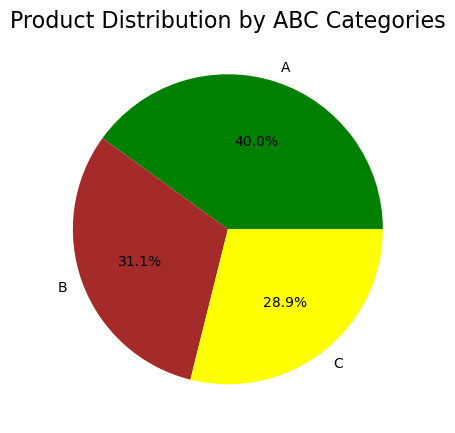

In [42]:
# Pie chart of product categories

abc_counts = abc_df["category"].value_counts()
plt.figure(figsize=(5, 8))
abc_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green", "brown", "yellow"], labels=["A", "B", "C"])
plt.title("Product Distribution by ABC Categories", fontsize=16)
plt.ylabel("")
plt.show()

**Observation:**  

**A Class:**
- Class A products account for about 78.45% of cumulative rate of total sales value but only account for 40% of total products (18/45)

**B Class:**
- Class B products account for 31.1% of total products. However, they have a lower contribution to the cumulative rate of total sales value than class A

**C Class:**
- Class C includes 28.9% of total number of products. These products accounts for 5% of the cumulative rate of total sales value, which is the lowest contribution.

In [44]:
# # Map the new column category to the products_df
# products_df = products_df.merge(abc_df[['product_id', 'category']], on='product_id', how='left')

# products_df

**Recommendation:**

- Class A products need to be prioritized for storage to avoid shortages.
- Class B products should be improved in quality and pricing strategy to increase sales.
- Class C products should be associated with class A products in promotions (for example: "Buy a Latte mug (C class), get a cup of Latte (A Class) free", or "Buying Espresso Roast, bring the used bag in the next time of purchasing to get discount").
- Consider eliminating it to minimize the cost of manufacturing, packaging, shipping, etc. and focus on other products.

## FRM Analysis

FRM Analysis is a type of customer segmentation and behavioral targeting used to help businesses rank and segment customers based on the recency, frequency, and monetary value of a transaction.

In [48]:
# Check the latest date in the transactions_df
transactions_df['transaction_date'].max()

Timestamp('2023-06-30 00:00:00')

In [49]:
from datetime import datetime

# Set reference date 
reference_date = pd.Timestamp("2023-07-01")

# Calculate Frequency, Recency, and Monetary
frm_df = transactions_df.groupby("customer_id").agg(
    frequency=("transaction_id", "count"),
    recency=("transaction_date", lambda x: (reference_date - x.max()).days),
    monetary=("total_price", "sum")
).reset_index()

# Result
frm_df.head()

,customer_id,frequency,recency,monetary
0,C_1,67,5,289.8
1,C_100000,50,2,204.5
2,C_10002,1,87,9.5
3,C_10043,1,12,9.0
4,C_10045,2,18,9.1


In [50]:
# Function to assign scores (1 to 5) based on quantiles
def assign_score(series, ascending=True):
    if not ascending:
        series = -series
    return pd.qcut(series.rank(method="first"), 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Assign FRM scores
frm_df["f_score"] = assign_score(frm_df["frequency"], ascending=True)
frm_df["r_score"] = assign_score(frm_df["recency"], ascending=False)
frm_df["m_score"] = assign_score(frm_df["monetary"], ascending=True)

# Create a combined FRM score
frm_df["frm_score"] = frm_df["f_score"].astype(str) + frm_df["r_score"].astype(str) + frm_df["m_score"].astype(str)

# Result
frm_df.head()

,customer_id,frequency,recency,monetary,f_score,r_score,m_score,frm_score
0,C_1,67,5,289.8,5,5,5,555
1,C_100000,50,2,204.5,5,5,5,555
2,C_10002,1,87,9.5,1,1,2,112
3,C_10043,1,12,9.0,1,4,2,142
4,C_10045,2,18,9.1,2,4,2,242


In [51]:
# Classify customers based on FRM Score
def classify_customer(frm_score):
    if frm_score >= 555:
        return "High-Value"
    elif frm_score >= 444:
        return "Loyal"
    elif frm_score >= 333:
        return "Potential"
    else:
        return "At-Risk"

frm_df["customer_segment"] = frm_df["frm_score"].apply(lambda x: classify_customer(int(x)))

# Result
frm_df.head()

,customer_id,frequency,recency,monetary,f_score,r_score,m_score,frm_score,customer_segment
0,C_1,67,5,289.8,5,5,5,555,High-Value
1,C_100000,50,2,204.5,5,5,5,555,High-Value
2,C_10002,1,87,9.5,1,1,2,112,At-Risk
3,C_10043,1,12,9.0,1,4,2,142,At-Risk
4,C_10045,2,18,9.1,2,4,2,242,At-Risk


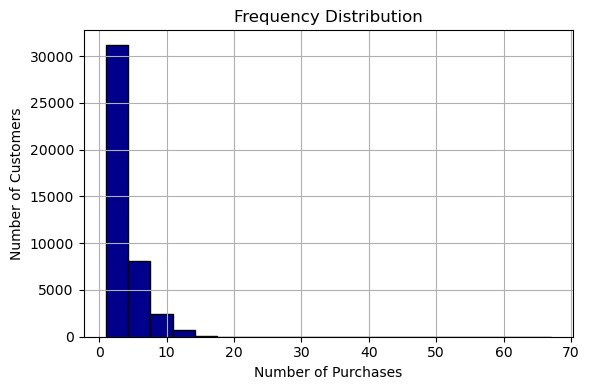

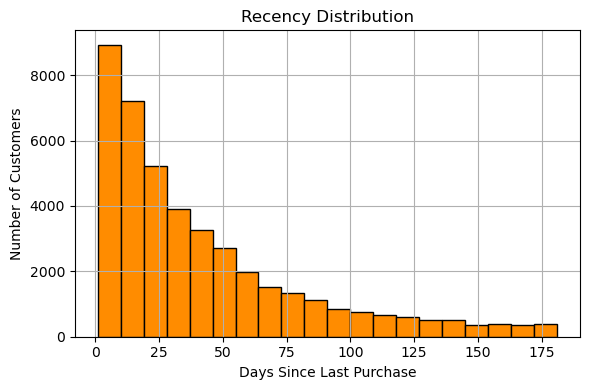

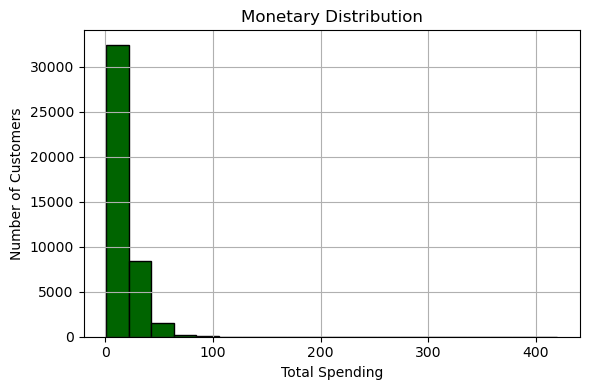

In [52]:
import matplotlib.pyplot as plt

# Plot Frequency Distribution
plt.figure(figsize=(6, 4))
plt.hist(frm_df["frequency"], bins=20, color="darkblue", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Recency Distribution
plt.figure(figsize=(6, 4))
plt.hist(frm_df["recency"], bins=20, color="darkorange", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Monetary Distribution
plt.figure(figsize=(6, 4))
plt.hist(frm_df["monetary"], bins=20, color="darkgreen", edgecolor="black")
plt.title("Monetary Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**

- All of the three histograms are right-skewed, which is understandable since most common behaviour of the customer in general is to buy not so many time and with the total bill under $50 
- The histogram of recency distribution indicates that most of our customer are recently visits the store, while the long tail of customers who haven’t purchased in a long time, suggesting a segment of inactive or at-risk customers.

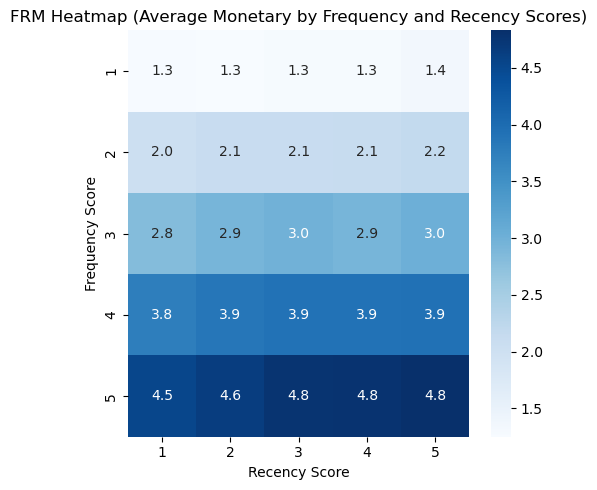

In [54]:
import seaborn as sns

# Create a pivot table for the heatmap
frm_pivot = frm_df.pivot_table(index="f_score", columns="r_score", values="m_score", aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(frm_pivot, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title("FRM Heatmap (Average Monetary by Frequency and Recency Scores)")
plt.xlabel("Recency Score")
plt.ylabel("Frequency Score")
plt.tight_layout()
plt.show()

**Observation:**  

1.	High Monetary Scores (Dark Blue) are concentrated in the right corner bottom row (F = 5, R = 5):
- Customers with high Frequency and recent purchases tend to have the highest Monetary Score (4.5 to 4.8).
- This indicates that the most valuable customers are those who purchase frequently and recently.

2.	Low Monetary Scores (Light Blue) are concentrated in the top corner (F = 1, R = 1):
- Customers with low Frequency and long Recency have the lowest Monetary Score (1.3 to 1.4).
- These customers are likely inactive or at-risk customers who haven’t purchased for a long time.

3.	Monetary Score gradually increases from top to bottom and left to right:
- As Frequency score improves, the Monetary Score also increases.
- The Monetary Score seems more influenced by Frequency than Recency, as seen in the gradual shift in color from light blue to dark blue along the vertical axis.


In [56]:
# # Map new segmentation column to the customers_df
# customers_df = customers_df.merge(frm_df[['customer_id', 'customer_segment']], on='customer_id', how='left')

# customers_df.head()

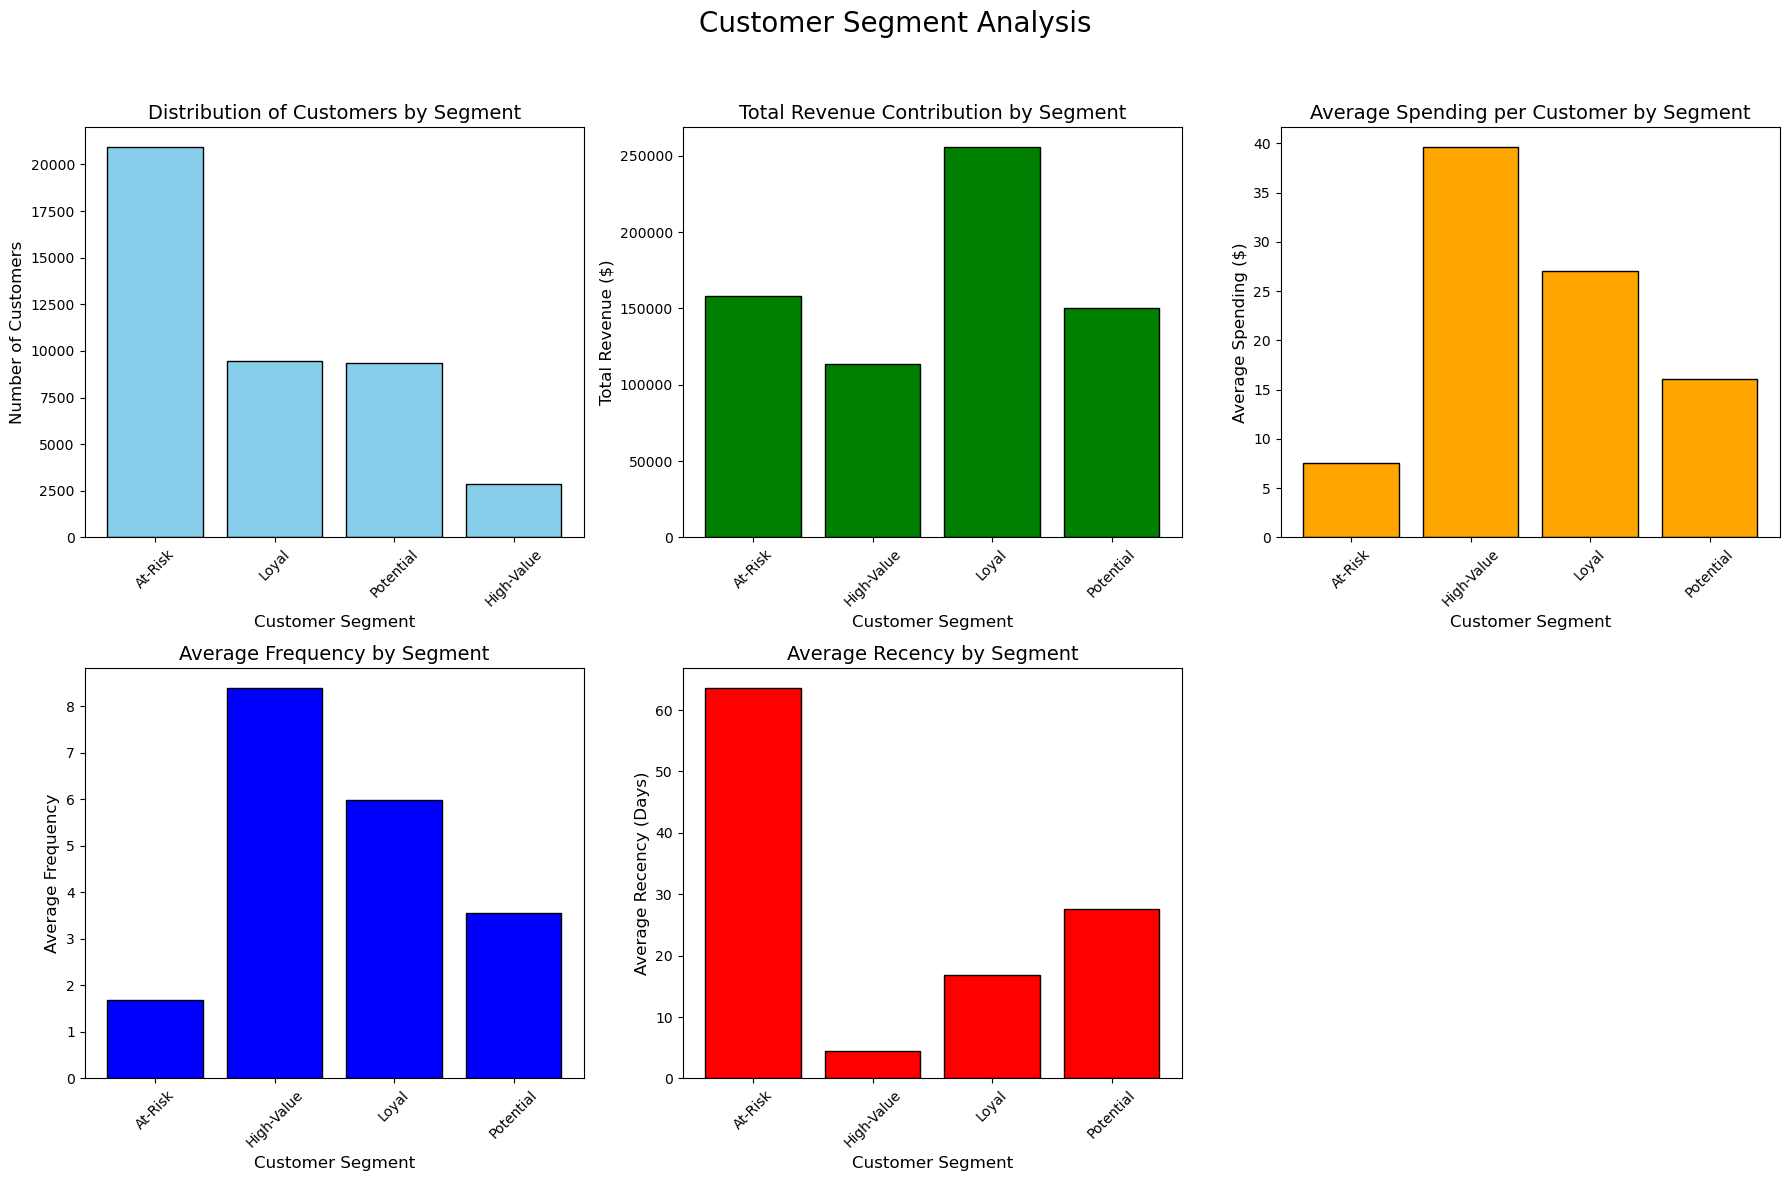

In [57]:
import matplotlib.pyplot as plt

# Create grid layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Customer Segment Analysis", fontsize=20)

# Chart 1: Distribution of Customers by Segment
segment_counts = frm_df["customer_segment"].value_counts()
axes[0, 0].bar(segment_counts.index, segment_counts.values, color="skyblue", edgecolor="black")
axes[0, 0].set_title("Distribution of Customers by Segment", fontsize=14)
axes[0, 0].set_xlabel("Customer Segment", fontsize=12)
axes[0, 0].set_ylabel("Number of Customers", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Chart 2: Total Revenue Contribution by Segment
segment_revenue = frm_df.groupby("customer_segment")["monetary"].sum()
axes[0, 1].bar(segment_revenue.index, segment_revenue.values, color="green", edgecolor="black")
axes[0, 1].set_title("Total Revenue Contribution by Segment", fontsize=14)
axes[0, 1].set_xlabel("Customer Segment", fontsize=12)
axes[0, 1].set_ylabel("Total Revenue ($)", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Chart 3: Average Spending per Customer by Segment
average_spending = frm_df.groupby("customer_segment")["monetary"].mean()
axes[0, 2].bar(average_spending.index, average_spending.values, color="orange", edgecolor="black")
axes[0, 2].set_title("Average Spending per Customer by Segment", fontsize=14)
axes[0, 2].set_xlabel("Customer Segment", fontsize=12)
axes[0, 2].set_ylabel("Average Spending ($)", fontsize=12)
axes[0, 2].tick_params(axis='x', rotation=45)

# Chart 4: Average Frequency by Segment
segment_fr = frm_df.groupby("customer_segment")[["frequency", "recency"]].mean()
axes[1, 0].bar(segment_fr.index, segment_fr["frequency"], color="blue", edgecolor="black")
axes[1, 0].set_title("Average Frequency by Segment", fontsize=14)
axes[1, 0].set_xlabel("Customer Segment", fontsize=12)
axes[1, 0].set_ylabel("Average Frequency", fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Chart 5: Average Recency by Segment
axes[1, 1].bar(segment_fr.index, segment_fr["recency"], color="red", edgecolor="black")
axes[1, 1].set_title("Average Recency by Segment", fontsize=14)
axes[1, 1].set_xlabel("Customer Segment", fontsize=12)
axes[1, 1].set_ylabel("Average Recency (Days)", fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Make the 6th chart to be blank
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Distribution of customer by segment:**
- The At Risk group accounts for the largest number of total customers, following by Loyal, Potential and High-Value groups
- The At-Risk group makes up the largest portion of the customer base. These customers have not made a purchase for a long time and are at risk of churning.
- Despite being the largest group by number, they pose a significant churn risk if no action is taken.

**Total revenue contribution by segment:**
- The Loyal group accounts for the largest amount of total revenue, following by At-Risk group, Potential and High-Value groups.
- Maintain the amount of customer from the Loyal group is the key objective of every campaign, in addition, to convert other group into the Loyal group.
- The At-Risk group has contributed a lot to the revenue historically but is now inactive. This indicates that they were previously valuable customers but disengaged recently. Losing these customers will significantly impact the future revenue.

**Average spending per customer by segment:**
- The High-value group accounts for the largest amount of average spending, following by Loyal, Potential and At-risk groups
- This indicates that high value group is the most valuable customers in terms of monetary contributions.

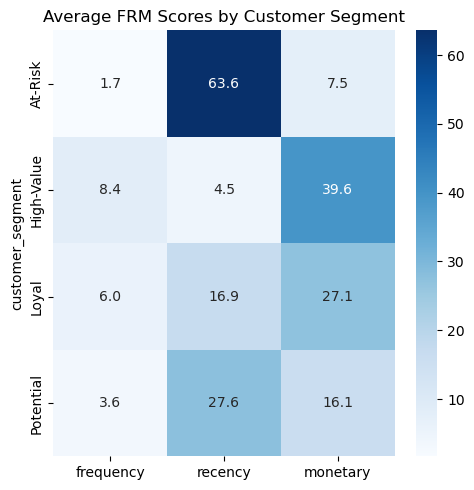

In [61]:
import seaborn as sns
# Create a pivot table for the heatmap
heatmap_data = frm_df.groupby("customer_segment")[["frequency", "recency", "monetary"]].mean()

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title("Average FRM Scores by Customer Segment")
plt.tight_layout()
plt.show()

**Observation - Behaviors of each segmentation**
- The at-risk customer segment are has the highest value of average recency, indicating these customers come to the store recently, but the come back rate is low and they also do not spend much each transaction.
- The high-value customer segment has the highest average monetary value per each customer and also the highest average frequency value compared to the other segments. It shows that this segment contains the most valuable customers who come to the store frequently and spend more each transaction.
- The loyal customer segment are customers who come to the restaurant regularly, second only to the high-value segment, who also have a high average spending value and most importantly, they have come to the restaurant recently.
- Regarding potential customer segments, although their spending per capita is not as high as the high value and loyal groups, they also have a lower number of return visits but are the group with the highest average recency value. These are customers who have returned to the restaurant recently.

Understanding the behaviors of each customer segmentation is our advantage to create strategies, launch marketing campaigns specified to each of those.  

**Recommendation:**

**At-Risk Customer:**
- Launch some Win-back Campaigns such as email marketing campaigns to re-engage At-Risk customers with offers
- Send feedback surveys to understand why these customers became inactive and address any issues they may have faced.

**Potential Customer:**
- Implement upselling or cross-selling campaigns to increase their spending, such as “Complete Your Set” product bundles or “You May Also Like” recommendations.
- Focus on upgrade potential customer to loyal customer by encouraging them to join a subscription program with some promotions such as accumulating spending points, redeeming points for gifts, getting free drinks from points, etc.

**Loyal Customer and High value Customer:**
- Encourage these customers to join a referral program where they can earn rewards by referring new customers.
- Utilize these segments to ask for feedback in order to provide services better.
- Offer exclusive benefits to keep these customers engaged, such as Birthday gifts, Anniversary rewards, Exclusive product previews, etc.
- Implement surprise and delight strategies, such as sending unexpected gifts or thank-you notes to show appreciation.

# Application developing

In [64]:
# Sort the transactions with the 
transactions_df = transactions_df.sort_values(by='transaction_id', ascending=False)
transactions_df = transactions_df.reset_index(drop=True)

transactions_df.head()

,transaction_id,transaction_date,quantity,unit_price,product_name,total_price,customer_id,product_id
0,149456,2023-06-30,2,0.80,Hazelnut syrup,1.60,C_47419,P_31
1,149455,2023-06-30,1,3.75,Cappuccino,3.75,C_53578,P_15
2,149454,2023-06-30,1,2.50,Peppermint,2.50,C_35479,P_17
3,149453,2023-06-30,2,3.00,English Breakfast,6.00,C_46474,P_22
4,149452,2023-06-30,2,2.50,Peppermint,5.00,C_48941,P_17


## Using `tkinter`

In [66]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from datetime import datetime

# Create the main application window
root = tk.Tk()
root.title("Sales Management System")
root.geometry("800x600")

# Create a Notebook widget to hold tabs
notebook = ttk.Notebook(root)
notebook.pack(fill='both', expand=True)

# Function to display DataFrame in a Treeview widget with scrollbar
def display_dataframe(tab, dataframe):
    frame = ttk.Frame(tab)
    frame.pack(fill='both', expand=True)

    tree = ttk.Treeview(frame)
    tree["columns"] = list(dataframe.columns)
    tree["show"] = "headings"

    for col in tree["columns"]:
        tree.heading(col, text=col)
        tree.column(col, width=100)

    for _, row in dataframe.iterrows():
        tree.insert("", "end", values=list(row))

    scrollbar = ttk.Scrollbar(frame, orient="vertical", command=tree.yview)
    tree.configure(yscrollcommand=scrollbar.set)
    tree.grid(row=0, column=0, sticky='nsew')
    scrollbar.grid(row=0, column=1, sticky='ns')

    frame.grid_rowconfigure(0, weight=1)
    frame.grid_columnconfigure(0, weight=1)
    return tree

# Create tabs
tab1 = ttk.Frame(notebook)
tab2 = ttk.Frame(notebook)
tab3 = ttk.Frame(notebook)

# Add tabs to the notebook
notebook.add(tab1, text="Transactions")
notebook.add(tab2, text="Customers")
notebook.add(tab3, text="Products")

# Display DataFrames in respective tabs
transaction_tree = display_dataframe(tab1, transactions_df)
customer_tree = display_dataframe(tab2, customers_df)
product_tree = display_dataframe(tab3, products_df)

In [67]:
# Update trees after filtering and adding and deleting
def update_transaction_tree():
    transaction_tree.delete(*transaction_tree.get_children())
    for _, row in transactions_df.iterrows():
        transaction_tree.insert("", "end", values=list(row))

def update_customer_tree():
    customer_tree.delete(*customer_tree.get_children())
    for _, row in customers_df.iterrows():
        customer_tree.insert("", "end", values=list(row))

def update_product_tree():
    product_tree.delete(*product_tree.get_children())
    for _, row in products_df.iterrows():
        product_tree.insert("", "end", values=list(row))

In [68]:
# Function to handle new transaction
def new_transaction():
    def save_transaction():
        global transactions_df, customers_df, products_df 

        try:
            product_name = product_name_entry.get()
            quantity = int(quantity_entry.get())
            customer_id = customer_id_entry.get().strip()

            # Validate product
            if product_name not in products_df['product_name'].values:
                messagebox.showerror("Error", "Product not found!")
                return

            # Validate stock
            product_row = products_df[products_df['product_name'] == product_name].iloc[0]
            if quantity > product_row['stock']:
                messagebox.showerror("Error", "Insufficient stock!")
                return

            # Calculate values for the new transaction
            new_transaction_id = transactions_df['transaction_id'].max() + 1
            transaction_date = datetime.now().strftime('%Y-%m-%d')
            unit_price = product_row['unit_price']
            total_price = unit_price * quantity
            product_id = product_row['product_id']

            # Update transactions_df
            new_transaction = {
                'transaction_id': new_transaction_id,
                'transaction_date': transaction_date,
                'quantity': quantity,
                'unit_price': unit_price,
                'product_name': product_name,
                'total_price': total_price,
                'customer_id': customer_id,
                'product_id': product_id
            }
            transactions_df = pd.concat([transactions_df, pd.DataFrame([new_transaction])], ignore_index=True)

            # Update products_df
            products_df.loc[products_df['product_id'] == product_id, 'stock'] -= quantity

            # Update customers_df
            if customer_id not in customers_df['customer_id'].values:
                new_customer = {
                    'customer_id': customer_id,
                    'total_spending': total_price,
                    'last_purchase_date': transaction_date
                }
                customers_df = pd.concat([customers_df, pd.DataFrame([new_customer])], ignore_index=True)
            else:
                customers_df.loc[customers_df['customer_id'] == customer_id, 'total_spending'] += total_price
                customers_df.loc[customers_df['customer_id'] == customer_id, 'last_purchase_date'] = transaction_date

            messagebox.showinfo("Success", "New transaction added successfully!")
            
            update_transaction_tree()
            update_customer_tree()
            update_product_tree()

            popup.destroy()

        except ValueError:
            messagebox.showerror("Error", "Please enter valid values!")

    # Popup window for new transaction input
    popup = tk.Toplevel(root)
    popup.title("New Transaction")

    tk.Label(popup, text="Product Name:").grid(row=0, column=0, padx=10, pady=5)
    product_name_entry = tk.Entry(popup)
    product_name_entry.grid(row=0, column=1, padx=10, pady=5)

    tk.Label(popup, text="Quantity:").grid(row=1, column=0, padx=10, pady=5)
    quantity_entry = tk.Entry(popup)
    quantity_entry.grid(row=1, column=1, padx=10, pady=5)

    tk.Label(popup, text="Customer ID:").grid(row=2, column=0, padx=10, pady=5)
    customer_id_entry = tk.Entry(popup)
    customer_id_entry.grid(row=2, column=1, padx=10, pady=5)

    save_button = tk.Button(popup, text="Save", command=save_transaction)
    save_button.grid(row=3, columnspan=2, pady=10)

In [69]:
# Function to delete a transaction
def delete_transaction():
    def confirm_delete():
        global transactions_df, customers_df, products_df  

        try:
            transaction_id = int(transaction_id_entry.get())  

        
            if transaction_id not in transactions_df['transaction_id'].values:
                messagebox.showerror("Error", f"Transaction ID '{transaction_id}' not found!")
                return

            
            transaction_row = transactions_df[transactions_df['transaction_id'] == transaction_id].iloc[0]
            product_id = transaction_row['product_id']
            quantity = transaction_row['quantity']
            total_price = transaction_row['total_price']
            customer_id = transaction_row['customer_id']
            transaction_date = transaction_row['transaction_date']

            # Delete transaction from transactions_df
            transactions_df = transactions_df[transactions_df['transaction_id'] != transaction_id]

            # Update products_df
            products_df.loc[products_df['product_id'] == product_id, 'stock'] += quantity

            # Update customers_df
            if customer_id in customers_df['customer_id'].values:
                # Update total spending
                customers_df.loc[customers_df['customer_id'] == customer_id, 'total_spending'] -= total_price

                # Update last purchase date
                remaining_transactions = transactions_df[transactions_df['customer_id'] == customer_id]
                if not remaining_transactions.empty:
                    last_date = remaining_transactions['transaction_date'].max()
                    customers_df.loc[customers_df['customer_id'] == customer_id, 'last_purchase_date'] = last_date
                else:
                    # Delete customer if there are no transaction left
                    customers_df = customers_df[customers_df['customer_id'] != customer_id]

            messagebox.showinfo("Success", f"Transaction ID '{transaction_id}' deleted successfully!")
            
            update_transaction_tree()
            update_customer_tree()
            update_product_tree()

            popup.destroy()

        except ValueError:
            messagebox.showerror("Error", "Please enter a valid transaction ID!")

    # Popup window for deleting a transaction
    popup = tk.Toplevel(root)
    popup.title("Delete Transaction")

    tk.Label(popup, text="Transaction ID:").grid(row=0, column=0, padx=10, pady=5)
    transaction_id_entry = tk.Entry(popup)
    transaction_id_entry.grid(row=0, column=1, padx=10, pady=5)

    delete_button = tk.Button(popup, text="Delete", command=confirm_delete)
    delete_button.grid(row=1, columnspan=2, pady=10)

In [70]:
# Function to search for transaction
def search_transactions():
    query = transaction_search_entry.get().strip().lower()
    
    if not query:
        update_transaction_tree()  
        return

    filtered_df = transactions_df[
        transactions_df['transaction_id'].astype(str).str.contains(query) |
        transactions_df['product_name'].str.lower().str.contains(query) |
        transactions_df['customer_id'].str.lower().str.contains(query)
    ]

    transaction_tree.delete(*transaction_tree.get_children())
    for _, row in filtered_df.iterrows():
        transaction_tree.insert("", "end", values=list(row))

In [71]:
# Function to search for customer
def search_customers():
    query = customer_search_entry.get().strip().lower()
    
    if not query:
        update_customer_tree()  
        return

    filtered_df = customers_df[
        customers_df['customer_id'].str.lower().str.contains(query)
    ]

    customer_tree.delete(*customer_tree.get_children())
    for _, row in filtered_df.iterrows():
        customer_tree.insert("", "end", values=list(row))

In [72]:
def add_stock():
    def confirm_add():
        global products_df

        product_name = product_name_entry.get().strip()
        quantity = quantity_entry.get().strip()

        if not product_name or not quantity.isdigit():
            messagebox.showerror("Error", "Please enter valid values!")
            return

        quantity = int(quantity)

        if product_name not in products_df['product_name'].values:
            messagebox.showerror("Error", f"Product '{product_name}' not found!")
            return

        products_df.loc[products_df['product_name'] == product_name, 'stock'] += quantity

        messagebox.showinfo("Success", f"Stock for '{product_name}' updated successfully!")

        update_product_tree()

        popup.destroy()

    popup = tk.Toplevel(root)
    popup.title("Add Stock")

    tk.Label(popup, text="Product Name:").grid(row=0, column=0, padx=10, pady=5)
    product_name_entry = tk.Entry(popup)
    product_name_entry.grid(row=0, column=1, padx=10, pady=5)

    tk.Label(popup, text="Quantity:").grid(row=1, column=0, padx=10, pady=5)
    quantity_entry = tk.Entry(popup)
    quantity_entry.grid(row=1, column=1, padx=10, pady=5)

    add_button = tk.Button(popup, text="Add", command=confirm_add)
    add_button.grid(row=2, columnspan=2, pady=10)

In [73]:
# Add "New Transaction" button to Transactions tab
new_transaction_button = tk.Button(tab1, text="New Transaction", command=new_transaction)
new_transaction_button.pack(pady=10)

# Add "Delete Transaction" button to Transactions tab
delete_transaction_button = tk.Button(tab1, text="Delete Transaction", command=delete_transaction)
delete_transaction_button.pack(pady=10)

# Add searching bar for Transactions
transaction_search_entry = tk.Entry(tab1)
transaction_search_entry.pack(pady=5)
transaction_search_button = tk.Button(tab1, text="Search", command=search_transactions)
transaction_search_button.pack(pady=5)

# Add searching bar for Customers
customer_search_entry = tk.Entry(tab2)
customer_search_entry.pack(pady=5)
customer_search_button = tk.Button(tab2, text="Search", command=search_customers)
customer_search_button.pack(pady=5)

# Add refresh button
refresh_button = tk.Button(tab1, text="Refresh", command=update_transaction_tree)
refresh_button.pack(pady=10)

# Add "Add Stock" to tab Products
add_stock_button = tk.Button(tab3, text="Add Stock", command=add_stock)
add_stock_button.pack(pady=10)

In [74]:
# Run the application
root.mainloop()